In [11]:
# Imports
import sys

sys.path.append("../../")
from src import get_worst_instance
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

# Constants
Ts = [1, 2, 5]
mu = 0
L = 1
gamma = 1 / L

# Tolerances
EPSILONS = np.linspace(0.01, 0.1, 100)

def to_add(eps):
    def additional(sgd):
        sgd.constraints += [sgd.rho <= 2 - eps]
    return additional

# Shorthands for the functions
get_variance = lambda gamma, T, eps: get_worst_instance(gamma, T, mu, L, additional_constraints=to_add(eps), objective="variance")

# Pre-Compute all instances
variances = [[get_variance(gamma, T, eps) for eps in tqdm(EPSILONS)] for T in Ts]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

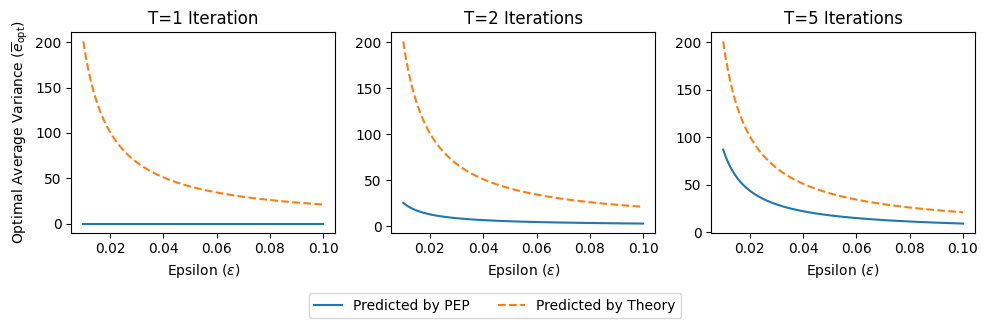

In [13]:
# Plot result with theoretical overlay
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Theoretical variance
def variance_theory(eps):
    return (2 + eps) / (eps)

for i, (T, ax) in enumerate(zip(Ts, axs.flatten())):
    # Plot empirical results
    ax.plot(EPSILONS, [v.param.variance_avg.value if v else None for v in variances[i]], label="Predicted by PEP")

    # Plot theoretical bound
    ax.plot(EPSILONS, [variance_theory(eps) for eps in EPSILONS], "--", label="Predicted by Theory")

    # Axis metadata
    ax.set_title(f"T={T} Iteration{'s' if T > 1 else ''}")
    ax.set_xlabel(r"Epsilon ($\varepsilon$)")
    if i == 0: ax.set_ylabel(r"Optimal Average Variance ($\overline{e}_{\text{opt}}$)")

# Get and show legend
handles, labels = axs.flatten()[0].get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))
plt.show()